In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_3BA6GZX.zip to test_3BA6GZX.zip
Saving train_u5jK80M.zip to train_u5jK80M.zip
User uploaded file "test_3BA6GZX.zip" with length 577993 bytes
User uploaded file "train_u5jK80M.zip" with length 2670660 bytes


In [0]:
!unzip train_u5jK80M.zip
!unzip test_3BA6GZX.zip
!ls /content/

Archive:  train_u5jK80M.zip
  inflating: train.csv               
Archive:  test_3BA6GZX.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
__MACOSX  sample_data  test_3BA6GZX.zip  test.csv  train.csv  train_u5jK80M.zip


In [0]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(20)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1


In [0]:
import warnings; warnings.simplefilter('ignore')
# Generating dataset profile
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [0]:
df['origination_date'] = pd.to_datetime(df['origination_date'])
df['first_payment_date'] = pd.to_datetime(df['first_payment_date'])
#df['FirstPaymentDays'] = df['first_payment_date'] - df['origination_date'] 
#df['FirstPaymentDays'] = df['FirstPaymentDays'].dt.days
df['borrower_credit_score'] = df['borrower_credit_score'] + df['co-borrower_credit_score']
df['m14'] = df['m1']+df['m2']+df['m3']+df['m4']+df['m5']+df['m6']+df['m7']+df['m8']+df['m9']+df['m10']+df['m11']+df['m12']
df.head()


#df['FirstPaymentDays'].unique()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,1271.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,4
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,66


In [0]:
df.shape

(116058, 30)

In [0]:
df.number_of_borrowers.unique()

array([1., 2.])

In [0]:
df.financial_institution.unique()
df.loan_purpose.unique()

array(['C86', 'B12', 'A23'], dtype=object)

In [0]:
def data_preprocess(df,columns_to_be_label_encoded,columns_to_be_dropped):
  '''df['origination_date'] = pd.to_datetime(df['origination_date'])
  df['first_payment_date'] = pd.to_datetime(df['first_payment_date'])
  df['FirstPaymentDays'] = df['first_payment_date'] - df['origination_date'] 
  df['FirstPaymentDays'] = df['FirstPaymentDays'].dt.days'''
  df_new = df.drop(columns_to_be_dropped, inplace=False, axis=1)
  df_new = pd.get_dummies(df_new, columns=columns_to_be_label_encoded)
  return df_new

In [0]:
columns_to_be_dropped=['m1','m2','m3','m4','m5','m5','m6','m7','m8','m9','m10','m11','m12','m13','loan_id','origination_date','first_payment_date','co-borrower_credit_score','number_of_borrowers','loan_purpose',"insurance_type","insurance_percent"]
columns_to_be_label_encoded = ["financial_institution","source"]
tempdf = data_preprocess(df,columns_to_be_label_encoded,columns_to_be_dropped)
tempdf.head()
tempdf.shape

(116058, 29)

EDA : https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [0]:
# df['m13'].value_counts().plot(kind='bar')

In [0]:
# df[df['m13']==0]['loan_purpose'].value_counts().sort_index().plot(kind='bar',title='Loan purpose and defaulers')

In [0]:
# df[df['m13']==1]['number_of_borrowers'].value_counts().sort_index().plot(kind='bar',title='number_of_borrowers and defaulers')
# df[df['m13'] == 1].size

In [0]:
# df[df['m13']==1]['source'].value_counts().sort_index().plot(kind='bar',title='source and defaulers')

In [0]:
#df['co-borrower_credit_score'].unique()
#df[df['m13']==1]['co-borrower_credit_score'].value_counts().sort_index().plot(kind='bar',title='co-borrower_credit_score and defaulers')
#bins = list(range(600,850,25))
#print(bins)
#df['cbcsBin']=pd.cut(df['co-borrower_credit_score'],bins)
#df[df['m13']==1]['cbcsBin'].value_counts().sort_index().plot(kind='bar',title='co-borrower_credit_score and defaulers')

In [0]:
'''df[df['m13']==1]['FirstPaymentDays'].value_counts().sort_index().plot(kind='bar',title='FirstPaymentDays and defaulers')
FirstPaymentDays'''

"df[df['m13']==1]['FirstPaymentDays'].value_counts().sort_index().plot(kind='bar',title='FirstPaymentDays and defaulers')\nFirstPaymentDays"

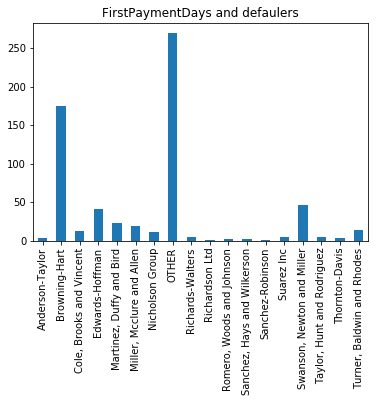

In [0]:
df[df['m13']==1]['financial_institution'].value_counts().sort_index().plot(kind='bar',title='FirstPaymentDays and defaulers')

In [0]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = tempdf   #independent columns
y = df["m13"]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features'''

'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\n\nX = tempdf   #independent columns\ny = df["m13"]    #target column i.e price range\n#apply SelectKBest class to extract top 10 best features\nbestfeatures = SelectKBest(score_func=chi2, k=10)\nfit = bestfeatures.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n#concat two dataframes for better visualization \nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = [\'Specs\',\'Score\']  #naming the dataframe columns\nprint(featureScores.nlargest(20,\'Score\'))  #print 10 best features'

In [0]:
'''import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_be_dropped=['co-borrower_credit_score','loan_id','origination_date']
columns_to_be_label_encoded = ["financial_institution","source","loan_purpose","insurance_type","number_of_borrowers","first_payment_date"]
eda_df = data_preprocess(df,columns_to_be_label_encoded,columns_to_be_dropped)
#print(eda_df.head())


def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(30, 30))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(eda_df)'''

'import pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ncolumns_to_be_dropped=[\'co-borrower_credit_score\',\'loan_id\',\'origination_date\']\ncolumns_to_be_label_encoded = ["financial_institution","source","loan_purpose","insurance_type","number_of_borrowers","first_payment_date"]\neda_df = data_preprocess(df,columns_to_be_label_encoded,columns_to_be_dropped)\n#print(eda_df.head())\n\n\ndef heatMap(df):\n    #Create Correlation df\n    corr = df.corr()\n    #Plot figsize\n    fig, ax = plt.subplots(figsize=(30, 30))\n    #Generate Color Map\n    colormap = sns.diverging_palette(220, 10, as_cmap=True)\n    #Generate Heat Map, allow annotations and place floats in map\n    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")\n    #Apply xticks\n    plt.xticks(range(len(corr.columns)), corr.columns);\n    #Apply yticks\n    plt.yticks(range(len(corr.columns)), corr.columns)\n    #show plot\n    plt.show()\nheatMap(eda_df)'

In [0]:
import numpy as np
X = np.array(tempdf)
print(X)

#scaling data
from sklearn import preprocessing
X = preprocessing.scale(X)
print(X)

m13 = df['m13']
y = np.array(m13)
print(y)

[[4.250e+00 2.140e+05 3.600e+02 ... 0.000e+00 0.000e+00 1.000e+00]
 [4.875e+00 1.440e+05 3.600e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.250e+00 3.660e+05 1.800e+02 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [3.875e+00 1.660e+05 3.600e+02 ... 1.000e+00 0.000e+00 0.000e+00]
 [4.250e+00 1.690e+05 3.600e+02 ... 1.000e+00 0.000e+00 0.000e+00]
 [3.375e+00 2.520e+05 1.800e+02 ... 0.000e+00 0.000e+00 1.000e+00]]
[[ 0.82651708  0.05034483  0.75442817 ... -1.106044   -0.69164335
   2.63138963]
 [ 2.18221241 -0.5600248   0.75442817 ... -1.106044    1.44583186
  -0.38002734]
 [-1.34259545  1.37571888 -1.25087412 ... -1.106044   -0.69164335
   2.63138963]
 ...
 [ 0.01309988 -0.36819435  0.75442817 ...  0.90412316 -0.69164335
  -0.38002734]
 [ 0.82651708 -0.34203565  0.75442817 ...  0.90412316 -0.69164335
  -0.38002734]
 [-1.07145638  0.38168834 -1.25087412 ... -1.106044   -0.69164335
   2.63138963]]
[1 1 1 ... 0 0 0]


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

Random Forest

In [0]:
##Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# #accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

 #Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

##Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_score: 0.6977094099989757
Accuracy: 0.9958211270032742


Naive Bayes

In [0]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
clf = GaussianNB()

# Train the model using the training sets
clf.fit(X_train,y_train)

#Predict Output
y_pred= clf.predict(X_test) # 0:Overcast, 2:Mild
#print "Predicted Value:", predicted

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_score: 0.13481567189118315
Accuracy: 0.152291917973462


SVM

In [0]:
#Import svm model

#from sklearn import svm

#Create a svm Classifier

#svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets

#svm_model.fit(X_train, y_train)

#Predict the response for test dataset

#y_pred = svm_model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))


f1_score: 0.6818027479885693
Accuracy: 0.9955195588488712
precision_score: 0.7894736842105263
recall_score: 0.23809523809523808


kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
X_train.size
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn_model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_score: 0.6818027479885693
Accuracy: 0.9955195588488712


Logistics regrassion

In [0]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logisticRegr.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score: 0.7050121614336144
Accuracy: 0.9958211270032742


Neural net

In [0]:
#https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# baseline model
def create_baseline():
  # create model
  model = Sequential()
  model.add(Dense(29, input_dim=29, kernel_initializer='normal', activation='relu'))
  model.add(Dense(29, kernel_initializer='normal', activation='relu'))
  model.add(Dense(29, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = create_baseline()
model.fit(X_train, y_train, epochs=10, verbose=1)


y_pred = model.predict_classes(X_test)

print("f1_score:",metrics.f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# show the inputs and predicted outputs
# for i in range(len(X_test)):
# 	print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))

# evaluate model with standardized dataset

# estimator = KerasClassifier(build_fn=create_baseline, epochs=5, batch_size=5, verbose=1)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



W0906 12:50:45.562506 140683782047616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
92846/92846 [==============================] - 13s 140us/step - loss: 0.0339 - acc: 0.9944
Epoch 2/10
92846/92846 [==============================] - 9s 92us/step - loss: 0.0208 - acc: 0.9955
Epoch 3/10
92846/92846 [==============================] - 9s 93us/step - loss: 0.0204 - acc: 0.9954
Epoch 4/10
92846/92846 [==============================] - 9s 95us/step - loss: 0.0203 - acc: 0.9955
Epoch 5/10
92846/92846 [==============================] - 9s 92us/step - loss: 0.0201 - acc: 0.9957
Epoch 6/10
92846/92846 [==============================] - 9s 92us/step - loss: 0.0198 - acc: 0.9957
Epoch 7/10
92846/92846 [==============================] - 8s 91us/step - loss: 0.0198 - acc: 0.9957
Epoch 8/10
92846/92846 [==============================] - 9s 93us/step - loss: 0.0197 - acc: 0.9959
Epoch 9/10
92846/92846 [==============================] - 9s 92us/step - loss: 0.0197 - acc: 0.9957
Epoch 10/10
92846/92846 [==============================] - 9s 93us/step - loss: 0.0196 - acc: 0.99

In [0]:
import pandas as pd
df_test = pd.read_csv('test.csv')


# df_test['origination_date'] = pd.to_datetime(df_test['origination_date'])
# df_test['first_payment_date'] = pd.to_datetime(df_test['first_payment_date'],format='%b-%y')
# df_test['FirstPaymentDays'] = df_test['first_payment_date'] - df_test['origination_date'] 
# df_test['FirstPaymentDays'] = df_test['FirstPaymentDays'].dt.days
df_test['m14'] = df_test['m1']+df_test['m2']+df_test['m3']+df_test['m4']+df_test['m5']+df_test['m6']+df_test['m7']+df_test['m8']+df_test['m9']+df_test['m10']+df_test['m11']+df_test['m12']
df_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m14
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
columns_to_be_dropped=['m1','m2','m3','m4','m5','m5','m6','m7','m8','m9','m10','m11','m12','loan_id','origination_date','first_payment_date','co-borrower_credit_score','number_of_borrowers','loan_purpose',"insurance_type","insurance_percent"]
columns_to_be_label_encoded = ["financial_institution","source"]
tempdf = data_preprocess(df_test,columns_to_be_label_encoded,columns_to_be_dropped)

tempdf.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,m14,financial_institution_Anderson-Taylor,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",source_X,source_Y,source_Z
0,3.875,417000,360,75,20,790,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4.500,113000,360,80,33,793,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.500,72000,360,75,34,710,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.125,123000,180,41,24,798,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.250,166000,180,53,12,767,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
import numpy as np
X_test = np.array(tempdf)
#print(X_test)

#scaling data
from sklearn import preprocessing
X_test = preprocessing.scale(X_test)
print(X_test)

[[ 0.00466889  1.8264218   0.74884332 ... -1.10477598  1.4414694
  -0.37872285]
 [ 1.3617978  -0.82720604  0.74884332 ...  0.90516088 -0.69373654
  -0.37872285]
 [ 1.3617978  -1.18509664  0.74884332 ... -1.10477598  1.4414694
  -0.37872285]
 ...
 [ 0.81894623 -0.06777965  0.74884332 ...  0.90516088 -0.69373654
  -0.37872285]
 [ 1.09037202  1.67802814  0.74884332 ... -1.10477598  1.4414694
  -0.37872285]
 [ 1.09037202 -0.22490235  0.74884332 ...  0.90516088 -0.69373654
  -0.37872285]]


In [0]:
#y_test_pred = clf.predict(X_test)
#print(y_test_pred)

# y_test_pred = model.predict_classes(X_test)
# print(y_test_pred)

# y_test_pred = logisticRegr.predict(X_test)
# print(y_test_pred)


y_test_pred = svm_model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


In [0]:
print(y_test_pred.size)
print(df_test.loan_id.size)

35866
35866


In [0]:
print(np.unique(y_test_pred))
y_test_pred=np.array(y_test_pred)
df2 = pd.DataFrame(y_test_pred, columns=['m13'])
final_df = pd.concat([df_test, df2], axis=1)

defaulters_df = final_df[final_df['m13'] > 0] 
defaulters_df.head(100)

[0 1]


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m14,m13
4475,4476,X,OTHER,5.250,412000,360,01/01/12,Mar-12,80,1,44,691,C86,0,0,0,0,0,0,0,0,1,2,3,4,5,6,7,28,1
6411,6412,X,OTHER,4.500,236000,360,01/01/12,Mar-12,80,1,35,680,B12,0,0,0,1,2,1,0,1,1,2,3,3,3,3,4,24,1
7730,7731,X,OTHER,3.875,157000,360,01/01/12,Mar-12,33,1,20,689,A23,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,9,1
8756,8757,Y,Edwards-Hoffman,4.250,120000,360,01/01/12,Mar-12,54,1,44,720,B12,0,0,0,0,0,0,0,0,0,0,1,1,2,3,4,11,1
9186,9187,X,OTHER,4.000,340000,360,01/01/12,Mar-12,80,2,42,685,B12,0,733,0,3,4,5,0,0,0,0,0,0,0,0,0,12,1
9431,9432,X,OTHER,4.125,100000,360,01/01/12,Mar-12,90,1,36,713,A23,25,0,0,2,3,0,1,2,3,4,0,0,1,2,1,19,1
11507,11508,Y,Browning-Hart,4.375,400000,360,01/01/12,Mar-12,80,1,26,791,A23,0,0,0,0,0,0,0,1,0,1,2,3,4,5,6,22,1
11803,11804,Y,OTHER,4.375,230000,360,01/01/12,Feb-12,80,1,35,671,C86,0,0,0,0,0,1,1,1,2,2,2,3,3,4,0,19,1
11890,11891,Z,"Miller, Mcclure and Allen",3.990,135000,360,01/03/12,May-12,80,1,44,688,A23,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,8,1
12118,12119,X,OTHER,4.375,128000,360,01/03/12,May-12,38,1,22,632,B12,0,0,0,0,0,0,1,2,3,4,5,0,1,2,0,18,1


In [0]:
final_df.to_csv("/content/submission.csv",columns=['loan_id','m13'],index=False)

In [0]:
!cat /content/submission.csv 

loan_id,m13
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,0
16,1
17,0
18,0
19,0
20,0
21,0
22,0
23,0
24,0
25,0
26,0
27,0
28,0
29,0
30,0
31,0
32,0
33,0
34,0
35,0
36,0
37,0
38,0
39,0
40,0
41,0
42,0
43,0
44,0
45,0
46,0
47,0
48,0
49,0
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,0
59,0
60,0
61,0
62,0
63,0
64,0
65,0
66,0
67,0
68,0
69,0
70,0
71,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0
79,0
80,0
81,0
82,0
83,0
84,0
85,0
86,0
87,0
88,0
89,0
90,0
91,0
92,0
93,0
94,0
95,0
96,0
97,0
98,0
99,0
100,0
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,0
117,0
118,0
119,0
120,0
121,0
122,0
123,0
124,0
125,0
126,0
127,0
128,0
129,0
130,0
131,0
132,0
133,0
134,0
135,0
136,0
137,0
138,0
139,0
140,0
141,0
142,0
143,0
144,0
145,0
146,0
147,0
148,0
149,0
150,0
151,0
152,0
153,0
154,0
155,0
156,0
157,0
158,0
159,0
160,0
161,0
162,0
163,0
164,0
165,0
166,0
167,0
168,0
169,0
170,0
171,0
172,0
173,0
174,0
175,0
176,0
177,0
178,0
179,0
180,0
181,0
182,0
183,

In [0]:
!cp /content/submission.csv /content/drive/My\ Drive/'Colab Notebooks'/datasets/sumbission13_csv.csv